# EDA

Here we perform exploratory data analysis and sanity checks.

Here we clean up the merged file and quantify missingness in the data.

**Sections**
- [Setup](#Setup)
- [Load data](#Load-data)
- [Plotting](#Plotting)
- [Sense checks](###Sense-checks)

## Setup

In [1]:
# Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
# load the merged datasets

df = pd.read_csv("clean_data.csv")
df.sample()
df.columns

Index(['GEOID', 'StCoFIPS2019', 'StAbbr', 'NatWalkInd', 'Pop2018', 'HU2018',
       'HH2018', 'D2A_EPHHM', 'D2B_E8MIXA', 'D3B', 'D4A', 'D2A_Ranked',
       'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked', 'median_income',
       'percent_unemployed', 'percent_below_poverty',
       'percent_bachelor_and_higher', 'percent_over_65', 'percent_commute_car',
       'percent_commute_transit', 'percent_white', 'percent_black',
       'percent_native_american', 'percent_asian', 'percent_pacific_islander',
       'statedesc', 'countyname', 'totalpopulation', 'arthritis_crudeprev',
       'arthritis_crude95ci', 'bphigh_crudeprev', 'bphigh_crude95ci',
       'cancer_crudeprev', 'cancer_crude95ci', 'casthma_crudeprev',
       'casthma_crude95ci', 'chd_crudeprev', 'chd_crude95ci', 'copd_crudeprev',
       'copd_crude95ci', 'depression_crudeprev', 'depression_crude95ci',
       'diabetes_crudeprev', 'diabetes_crude95ci', 'highchol_crudeprev',
       'highchol_crude95ci', 'kidney_crudeprev', 'kidney_crude95

## Plotting

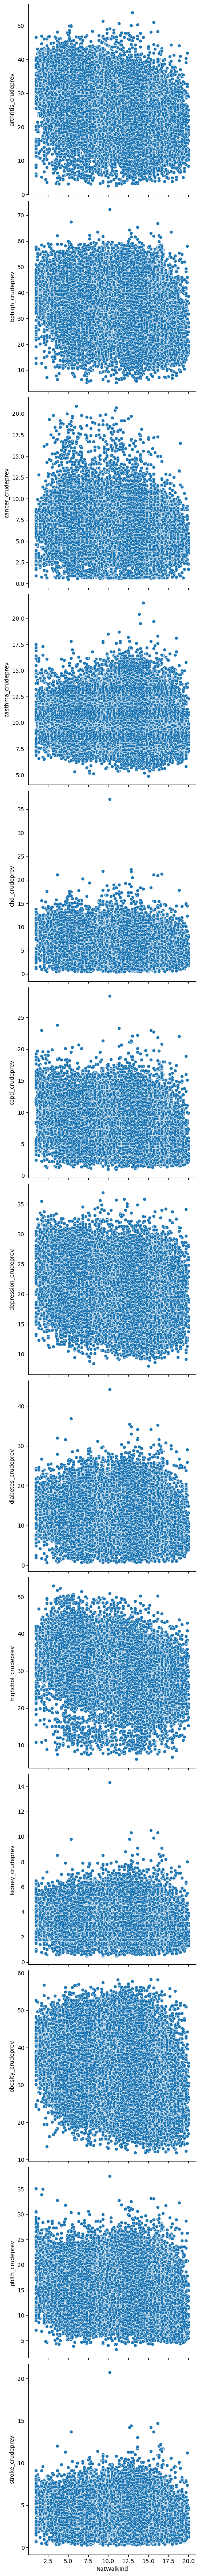

In [3]:
import seaborn as sns

# We extract the health outcome columns
health_outcomes_columns = [
    "arthritis_crudeprev",
    "bphigh_crudeprev",
    "cancer_crudeprev",
    "casthma_crudeprev",
    "chd_crudeprev",
    "copd_crudeprev",
    "depression_crudeprev",
    "diabetes_crudeprev",
    "highchol_crudeprev",
    "kidney_crudeprev",
    "obesity_crudeprev",
    "phlth_crudeprev",
    "stroke_crudeprev"
]

# We make scatter plot of each health oucome against walkability index
sns.pairplot(
    df,
    y_vars=health_outcomes_columns,
    x_vars=["NatWalkInd"],
    height=5,
    diag_kind=None,
)

plt.show()

## Sense checks

### Obesity vs Walkability

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

X = df_train[["NatWalkInd"]]
y = df_train["obesity_crudeprev"]

linear = LinearRegression()
dummy  = DummyRegressor(strategy="mean")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_lin, rmse_dummy = [], []

for tr_idx, va_idx in kf.split(X):
    Xtr, Xva = X.iloc[tr_idx], X.iloc[va_idx]
    ytr, yva = y.iloc[tr_idx], y.iloc[va_idx]

    linear.fit(Xtr, ytr)
    yhat = linear.predict(Xva)
    rmse_lin.append(np.sqrt(mean_squared_error(yva, yhat)))

    dummy.fit(Xtr, ytr)
    yhat_d = dummy.predict(Xva)
    rmse_dummy.append(np.sqrt(mean_squared_error(yva, yhat_d)))

print(f"Linear RMSE (CV): mean={np.mean(rmse_lin):.4f}, std={np.std(rmse_lin):.4f}")
print(f"Dummy  RMSE (CV): mean={np.mean(rmse_dummy):.4f}, std={np.std(rmse_dummy):.4f}")

Linear RMSE (CV): mean=6.5222, std=0.0416
Dummy  RMSE (CV): mean=6.8200, std=0.0338


Seems like we won't be able to model obesity using just walkability.

### Depression vs walkability

In [5]:
X = df_train[["NatWalkInd"]]
y = df_train["depression_crudeprev"]

linear = LinearRegression()
dummy  = DummyRegressor(strategy="mean")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_lin, rmse_dummy = [], []

for tr_idx, va_idx in kf.split(X):
    Xtr, Xva = X.iloc[tr_idx], X.iloc[va_idx]
    ytr, yva = y.iloc[tr_idx], y.iloc[va_idx]

    linear.fit(Xtr, ytr)
    yhat = linear.predict(Xva)
    rmse_lin.append(np.sqrt(mean_squared_error(yva, yhat)))

    dummy.fit(Xtr, ytr)
    yhat_d = dummy.predict(Xva)
    rmse_dummy.append(np.sqrt(mean_squared_error(yva, yhat_d)))

print(f"Linear RMSE (CV): mean={np.mean(rmse_lin):.4f}, std={np.std(rmse_lin):.4f}")
print(f"Dummy  RMSE (CV): mean={np.mean(rmse_dummy):.4f}, std={np.std(rmse_dummy):.4f}")

Linear RMSE (CV): mean=3.4474, std=0.0116
Dummy  RMSE (CV): mean=3.6505, std=0.0164


Seems like we won't be able to model depression using just walkability.

### Cholesterol vs walkability

In [6]:
X = df_train[["NatWalkInd"]]
y = df_train["highchol_crudeprev"]

linear = LinearRegression()
dummy  = DummyRegressor(strategy="mean")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_lin, rmse_dummy = [], []

for tr_idx, va_idx in kf.split(X):
    Xtr, Xva = X.iloc[tr_idx], X.iloc[va_idx]
    ytr, yva = y.iloc[tr_idx], y.iloc[va_idx]

    linear.fit(Xtr, ytr)
    yhat = linear.predict(Xva)
    rmse_lin.append(np.sqrt(mean_squared_error(yva, yhat)))

    dummy.fit(Xtr, ytr)
    yhat_d = dummy.predict(Xva)
    rmse_dummy.append(np.sqrt(mean_squared_error(yva, yhat_d)))

print(f"Linear RMSE (CV): mean={np.mean(rmse_lin):.4f}, std={np.std(rmse_lin):.4f}")
print(f"Dummy  RMSE (CV): mean={np.mean(rmse_dummy):.4f}, std={np.std(rmse_dummy):.4f}")

Linear RMSE (CV): mean=4.3553, std=0.0414
Dummy  RMSE (CV): mean=4.8060, std=0.0449


Seems like we won't be able to model cholesterol using just walkability.

### Obesity vs cholesterol

In [7]:
X = df_train[["highchol_crudeprev"]]
y = df_train["obesity_crudeprev"]

linear = LinearRegression()
dummy  = DummyRegressor(strategy="mean")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_lin, rmse_dummy = [], []

for tr_idx, va_idx in kf.split(X):
    Xtr, Xva = X.iloc[tr_idx], X.iloc[va_idx]
    ytr, yva = y.iloc[tr_idx], y.iloc[va_idx]

    linear.fit(Xtr, ytr)
    yhat = linear.predict(Xva)
    rmse_lin.append(np.sqrt(mean_squared_error(yva, yhat)))

    dummy.fit(Xtr, ytr)
    yhat_d = dummy.predict(Xva)
    rmse_dummy.append(np.sqrt(mean_squared_error(yva, yhat_d)))

print(f"Linear RMSE (CV): mean={np.mean(rmse_lin):.4f}, std={np.std(rmse_lin):.4f}")
print(f"Dummy  RMSE (CV): mean={np.mean(rmse_dummy):.4f}, std={np.std(rmse_dummy):.4f}")

Linear RMSE (CV): mean=6.4749, std=0.0243
Dummy  RMSE (CV): mean=6.8200, std=0.0338


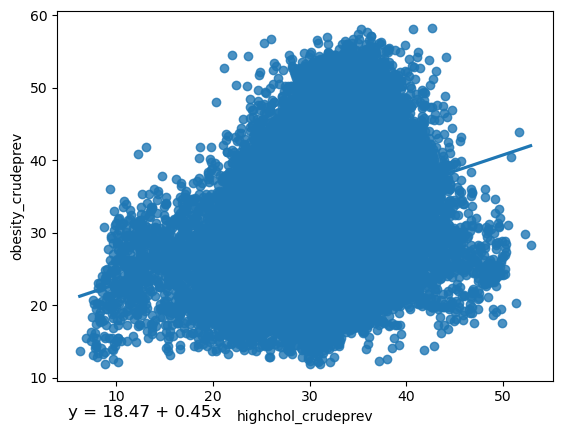

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      obesity_crudeprev   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     7590.
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        22:38:05   Log-Likelihood:            -2.3063e+05
No. Observations:               70158   AIC:                         4.613e+05
Df Residuals:                   70156   BIC:                         4.613e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             18.4681      0.164    112.270      0.000      18.146      18.790
highchol_crudeprev     0.4450      0.005     87.121      0.000       0.435       0.455
==============================================================================
Omnibus:                      700.387   Durbin-Watson:                   0.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              785.285
Skew:                           0.204   Prob(JB):                    3.00e-171
Kurtosis:                       3.321   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['highchol_crudeprev'], df['obesity_crudeprev'])

sns.regplot(x = "highchol_crudeprev", y = 'obesity_crudeprev', data = df)
plt.text(5, 4.5, f'y = {intercept:.2f} + {slope:.2f}x', fontsize=12)
plt.show()
model = smf.ols(formula='obesity_crudeprev ~ highchol_crudeprev', data=df).fit()
model.summary()

### Stroke vs obesity

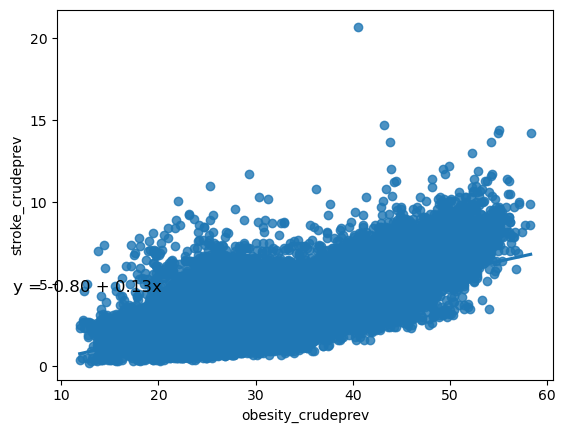

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       stroke_crudeprev   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                 6.467e+04
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        22:38:07   Log-Likelihood:                -94306.
No. Observations:               70158   AIC:                         1.886e+05
Df Residuals:                   70156   BIC:                         1.886e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.8009      0.017    -46.749      0.000      -0.835      -0.767
obesity_crudeprev     0.1307      0.001    254.311      0.000       0.130       0.132
==============================================================================
Omnibus:                    20686.001   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           116664.571
Skew:                           1.305   Prob(JB):                         0.00
Kurtosis:                       8.753   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['obesity_crudeprev'], df['stroke_crudeprev'])

sns.regplot(x = "obesity_crudeprev", y = 'stroke_crudeprev', data = df)
plt.text(5, 4.5, f'y = {intercept:.2f} + {slope:.2f}x', fontsize=12)
plt.show()
model = smf.ols(formula='stroke_crudeprev ~ obesity_crudeprev', data=df).fit()
model.summary()

### Cancer versus age

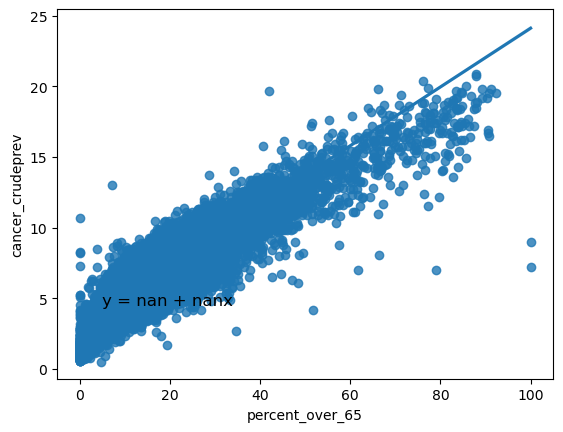

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       cancer_crudeprev   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 2.112e+05
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        22:41:03   Log-Likelihood:                -97192.
No. Observations:               70147   AIC:                         1.944e+05
Df Residuals:                   70145   BIC:                         1.944e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.3243      0.008    401.737      0.000       3.308       3.341
percent_over_65     0.2079      0.000    459.610      0.000       0.207       0.209
==============================================================================
Omnibus:                    12596.276   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61522.408
Skew:                          -0.793   Prob(JB):                         0.00
Kurtosis:                       7.305   Cond. No.                         41.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['percent_over_65'], df['cancer_crudeprev'])

sns.regplot(x = "percent_over_65", y = 'cancer_crudeprev', data = df)
plt.text(5, 4.5, f'y = {intercept:.2f} + {slope:.2f}x', fontsize=12)
plt.show()
model = smf.ols(formula='cancer_crudeprev ~ percent_over_65', data=df).fit()
model.summary()